# Step 1

### Intoduction
<b> adult.csv </b>
Sources:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

Description of Features: 

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. income: >50K, <=50K 

### Missing Values:

 7% rows have missing values. 

# Step 2

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data/adult.csv',na_values=['?']) #There are null values represented by '?'
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


# Step 3

In [3]:
#Let's Try to see all rows with null values 
df[df.isnull().any(axis=1)].head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,191846,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
75,17,NaN,165361,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
89,41,NaN,38434,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K


# Pattern Observed of missing values

So as one can see that most the null values are from 'workclass','occupation' and 'native-contry' column
I think that 'workclass' and 'occupation' column has some relationship with each other and with 'native-country', that is like in row 19 when we know the 'occupation' that is 'Prof-specialty' than one can say a lot about its 'workclass' which is 'Private' but 'native-country' is unknown, but in other columns like 30, we have just an opposite trend i.e., if we don't know 'workclass' and 'occupation' we know or have a record of 'native-contry' of that person, But same can'nt be said about non missing rows like row 1.  

In [4]:
#lets drop all NaN containing rows first
new_df=df.dropna()

#then drop 'fnlwqt' column but preserve df dataframe
new_df=new_df.drop(['fnlwgt'],axis=1)

new_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
#now lets print the percentage of missing rows

per=1-new_df.shape[0]/df.shape[0]
print(str(per*100) + '%')

7.411653904426519%


# Step 4 (Univariate Analysis)

In [6]:
#Lets get Information about all numeric columns

new_df.describe(include="int64")

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Observation
one can easily get an inference of outliers using this, I noticed following :
1. Dissrence between mean and median (50%) of 'capital-gain' column is big.
2. I can say the same for the 'capital-los' column too
3. Whereas, same difference is very small in case of other columns, that is between 0 and 1

From these observation I conclude 'capital-gain' and 'capital-loss' are having outliers, Let's Confirm via box-plot

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

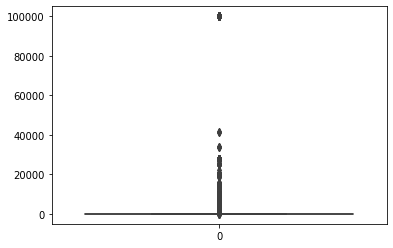

In [8]:
sns.boxplot(data=new_df['capital-gain'])

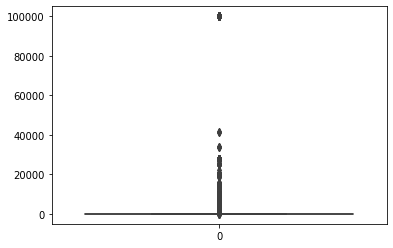

In [9]:
sns.boxplot(data=new_df['capital-gain'])

This figure concludes both columns are having outliers as we guessed. but lets also check other numerical columns too :} 

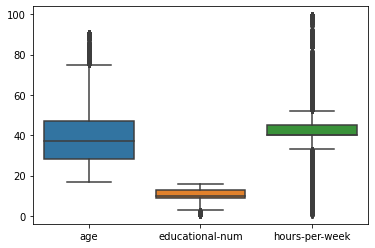

In [10]:
sns.boxplot(data=new_df.loc[:,['age','educational-num','hours-per-week']])

So this confirms that reallying only on instinct in EDA is not cool. Box-Plot is the best key to find outliers
and also, all numeric columns have outliers.(But sometimes it may state wrong.... By other Observations)

This is because because in every plot points are very far from boxplot whiskers

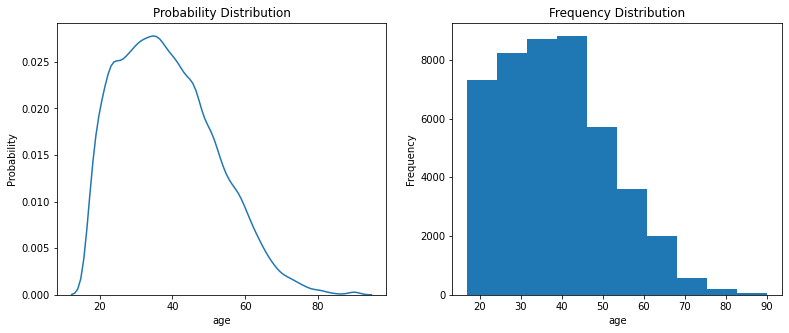

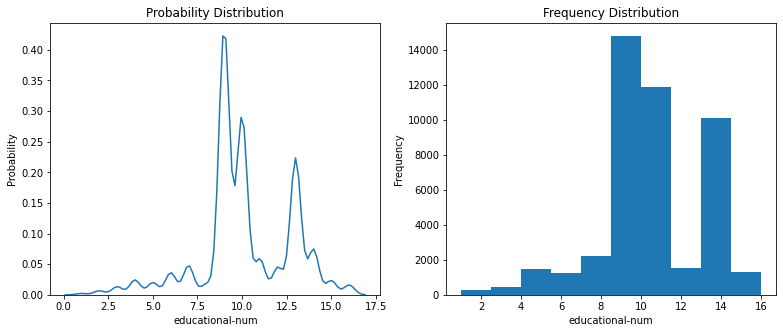

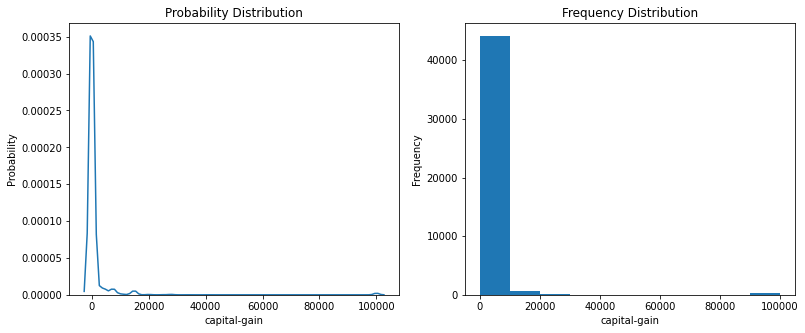

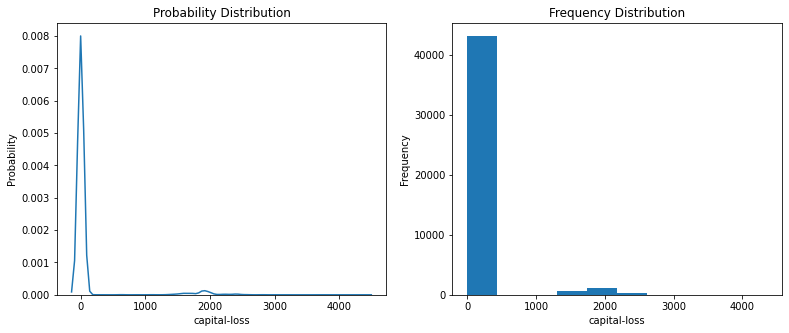

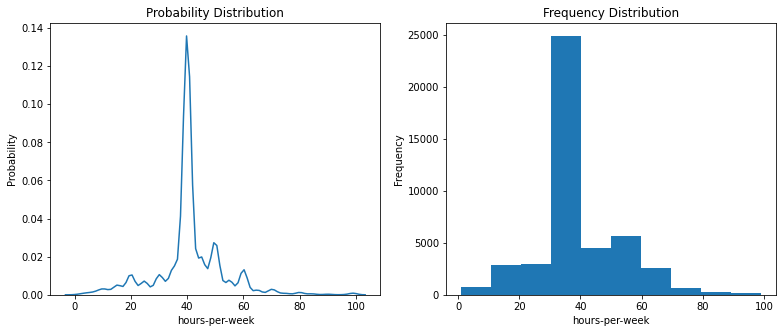

In [11]:
#Probaility Distribution of numerical columns

num_cols=list(new_df.describe(include="int64").columns.values)
#lets extract all numerical cols from dataframe
num_df=new_df.loc[:,num_cols]
for i in num_cols:
    plt.figure(figsize=(13,5))
    
    plt.subplot(1,2,1)
    sns.distplot(num_df[i],kde=True,hist=False)
    plt.title("Probability Distribution")
    plt.ylabel("Probability")
    
    plt.subplot(1,2,2)
    plt.hist(num_df[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution")
    plt.ylabel("Frequency")
    
    plt.show()

#ploting probability distribution and frequency distribution of this dataframe 

# Observation
1. Age:
   Most of the people are from age group of 30 to 45 which can be seen by frequency distribution. By probability distribution a trend of uneven distribution of people can be seen for an age group too.
   

2. educational-num:
   From both distribution an uneven high spread can be observed from range 8.75 to 11.75 and 12.5 and 15 in comparision of other ranges and thus the probability of getting something in this range is quite high.
   
   
3. capital-gain:
   Here a simple trend of higher itribution for the range 0-20000 can be seen might be becase there a people with higher capital-gain then the average populaton in the dataset
   
   
4. capital-loss:
   Here people in range 0-500 are having bigger losses in their capital income which is kind of a low in range from 1500-2500 in where people with reaiming ranges are having no losses at all.
   
   
5. Hours-per-week:
   Both distribution clearly states that people in the sge group of 30-40 are accpected to work for more hours then other age-group in which people from age-group 50-60 stood second.

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


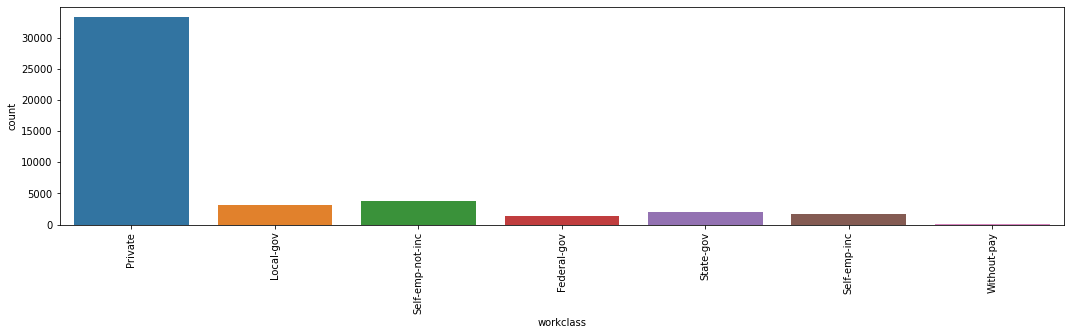

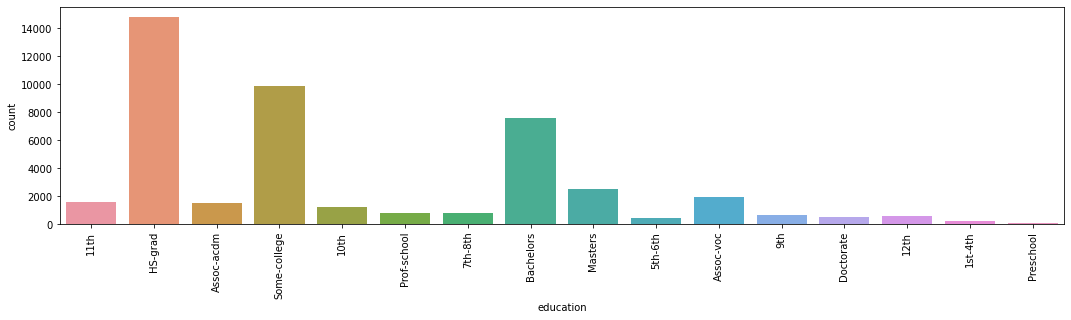

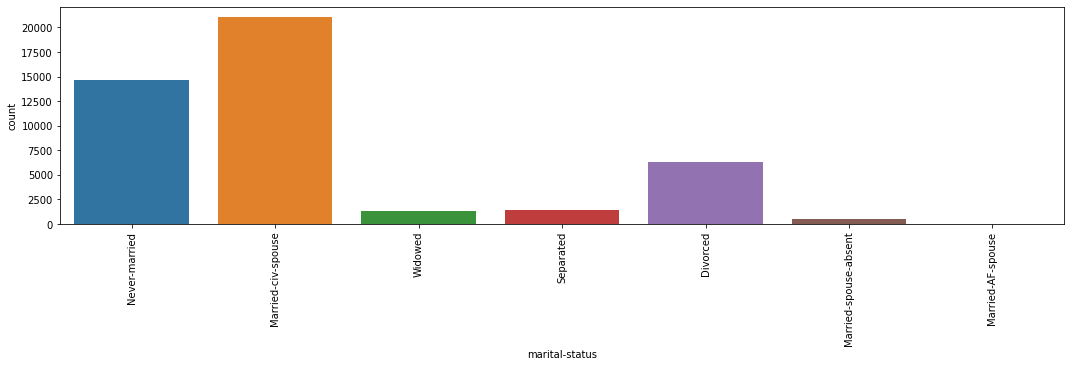

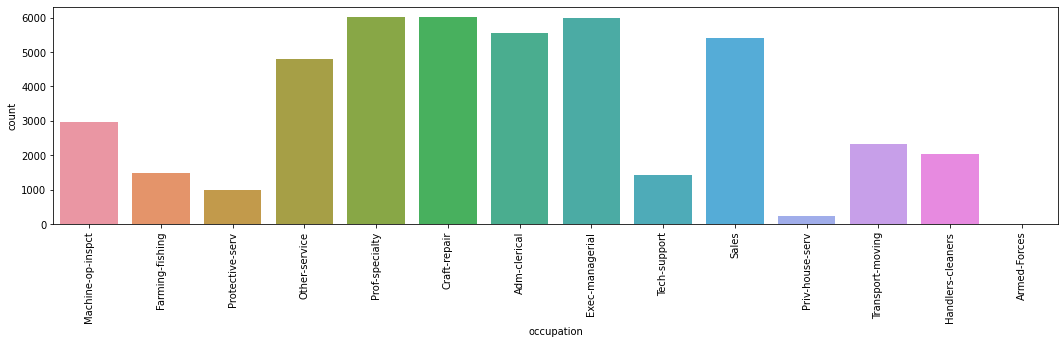

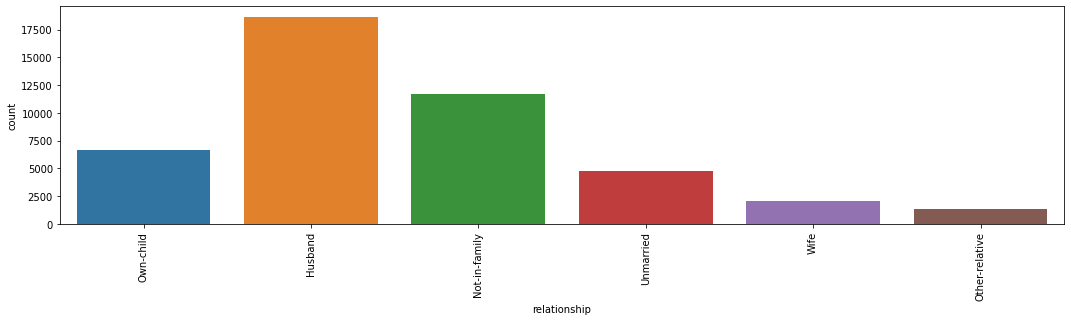

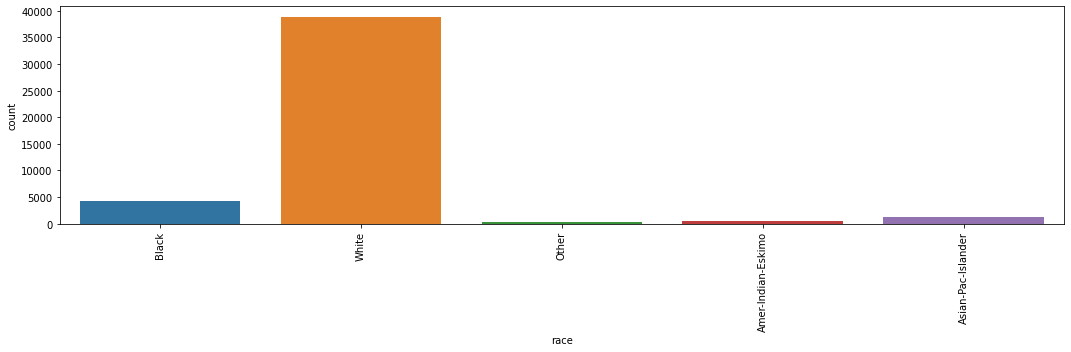

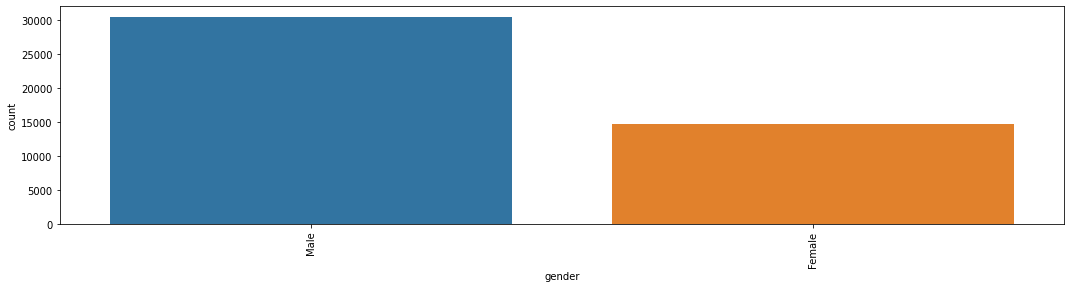

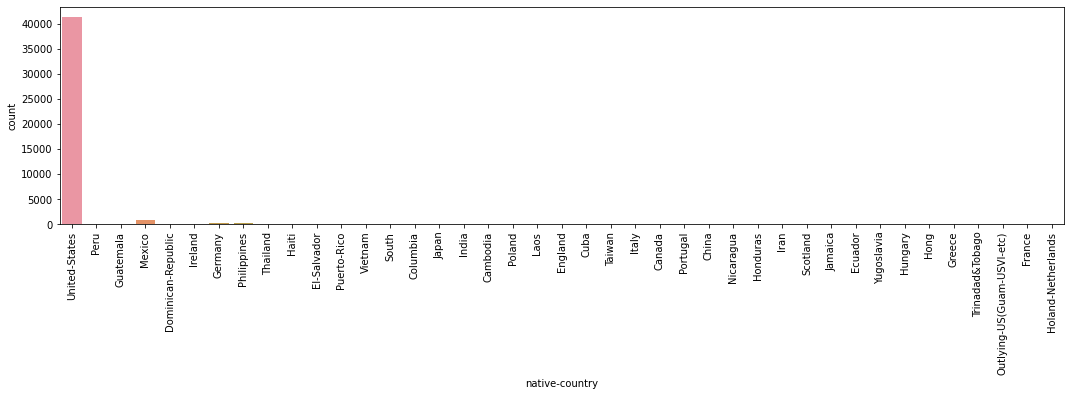

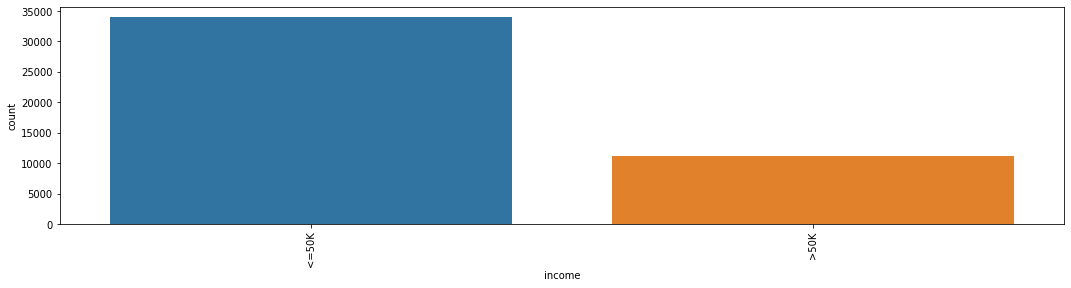

In [12]:
#get categorical feature column
cat_cols=list(new_df.describe(include="object").columns.values)
#found this technique to get column names in one go
print(cat_cols)#To display all categorical features name

cat_df=new_df.loc[:,cat_cols]


for i in cat_cols:
    plt.figure(figsize=(18,4))
    sns.countplot(x=i,data=cat_df)
    plt.xticks(rotation=90)

plt.show()

# Observation
1. WorkClass:
We can see that their more number of people involved in Private Sector (>30000) followed by other sectors too.

2. Education:
So most of the people in the dataset are 'High School Graduate' in the population followed by 'some-college' and then 'Bachelors'

3. Mrital-status:
In the etire population people having who are 'MAries-civ-spuse' rule the dataset with their number >20000

4. Occupation:
Their are many people who have occupation as 'other-service', 'prof-speciality','craft-repair','Adm-clerical','Exec-management' and 'sales' in comarision to other, where 'prof-speciality','craft-repair' and 'sales' have a tie in their cont.

5. relationship:
In the dataset most of the people are males as they are husband

6. race:
Here clearly we have a descrimination of population of 'whites' and people of other 4 races in the dataset.

7. Gender:
So, this the direct result of the observation number 5, where males are supirior on females in terms of population

8. native-country:
Here, Most of the people clearly belong to 'United-State' foloowed by 'mexico' only. This might be reason of the huge population of 'whites' in the dataset.

9. Income:
So, Most of the prople in the dataset are having their income more than 50K in there pockets.

# Step 5 (Bivariate Analysis)

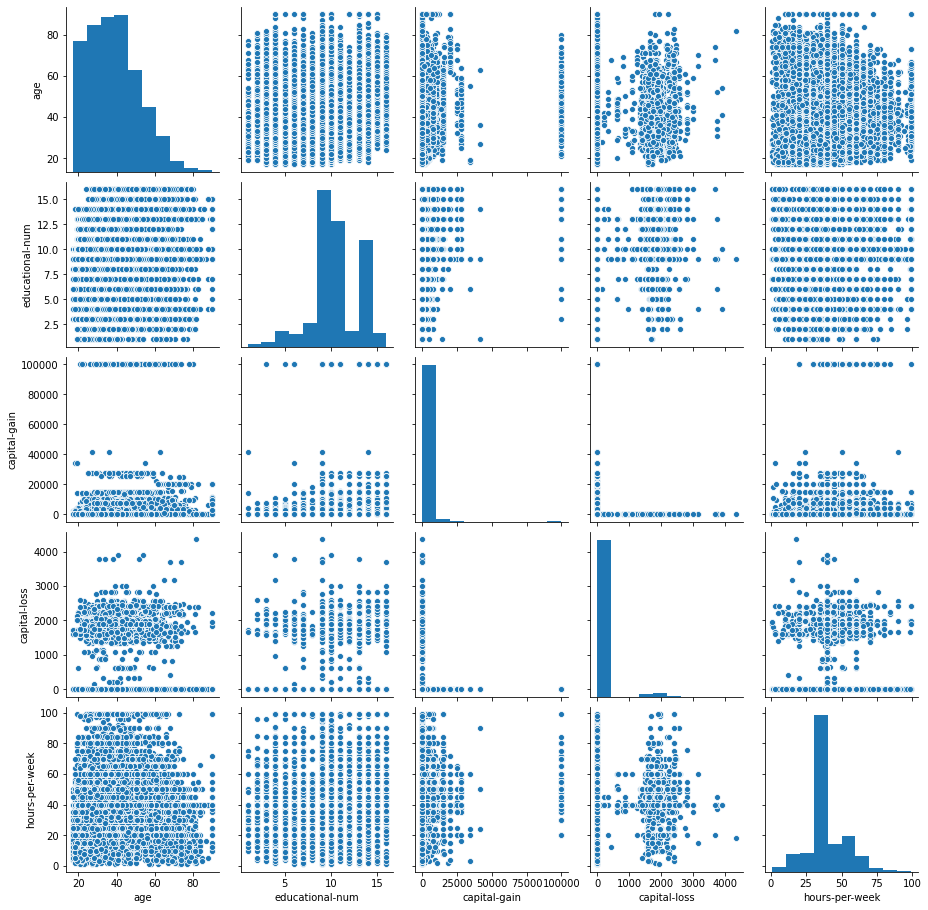

In [13]:
# num_df contains all numerical features of the dataset

# Lets do a pairplot beetween all numericall features

sns.pairplot(num_df)

## Observations:
So, All disgonal plots are simply bar-graphs and remaing others are scatter-plots. We cann also see than their is some-what relationship between 'capital-gain' and all remaing columns. That is, there are no people having capital-gain in the range of 50000 to 999999.
We can plot hexplot for this relation to see this trend

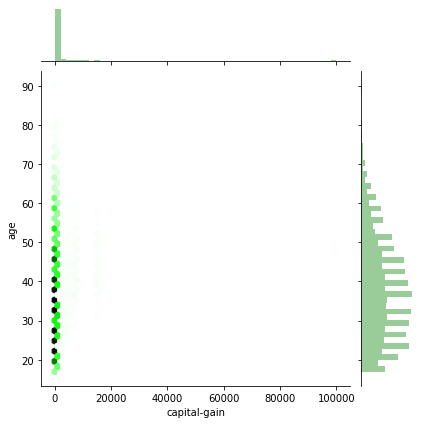

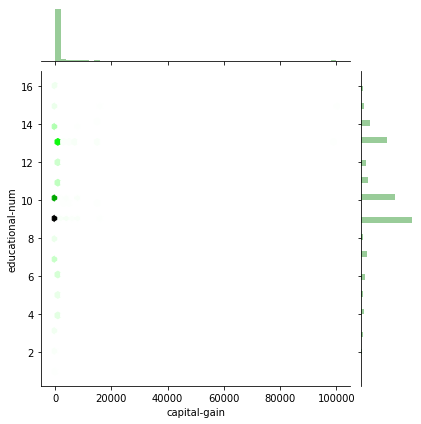

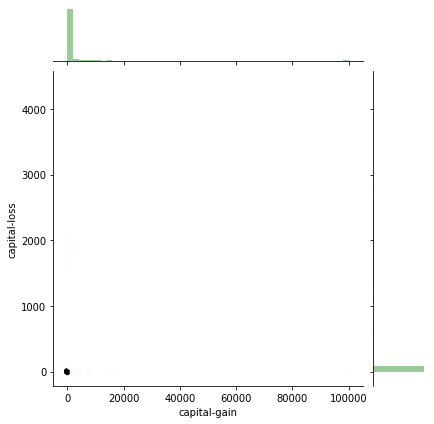

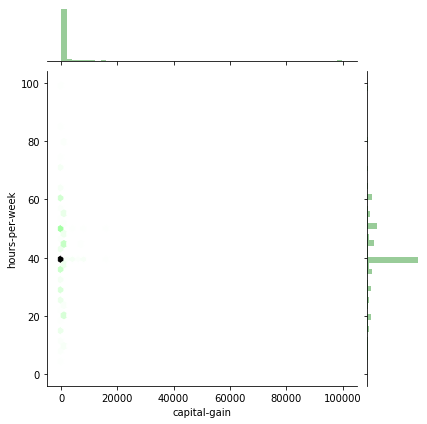

In [14]:
for i in num_cols:
    if not i=='capital-gain':
        sns.jointplot('capital-gain',i,data=num_df,kind='hex',color="green")

# Observation
I conclude by this plot that majority of people are having zero 'capital-gain' but that does not mean everyone is having zero 'capital-gain'

Also by observing scatter-plot and nexbinplot of 'capital-loss' vs 'capital-gain', I conclude a pattern that when 'capital-loss' is zero 'capital-gain' can be between 0 to 1 lakh but if 'capital-gain' is zero 'capital-loss' can be between 0 to more than 4000. Which is logical, that is if one has no-loss than he has some or no gain and vice-versa 

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


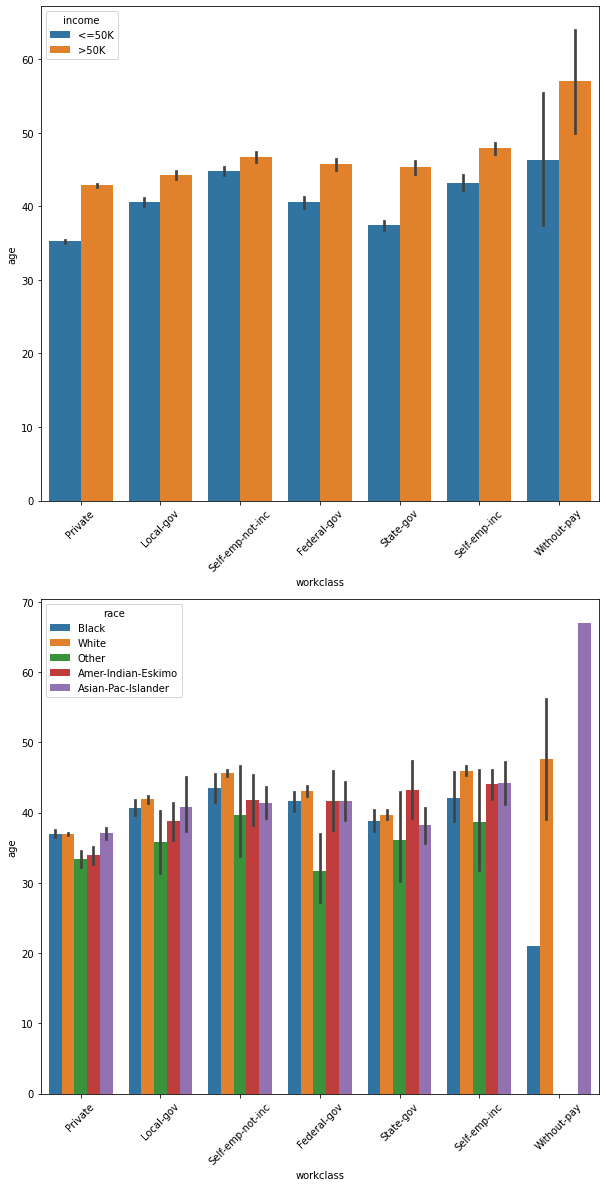

In [15]:
#Between Numerical and Categorical features

#Printing heading of numerical as well as categorical columns
print(num_cols)
print(cat_cols)
#lets see a relation between workclass and age based on race and income
plt.figure(figsize=(10,20))

plt.subplot(2,1,1)
sns.barplot(x='workclass',y='age',data=new_df, hue='income')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.barplot(x='workclass',y='age',data=new_df, hue='race')
plt.xticks(rotation=45)

plt.show()

# Observation
I can observe by this graph that people with age more than 50 are earning more than 50K and are generally Asian-Pac-Islander and have a workclass of 'without-pay'

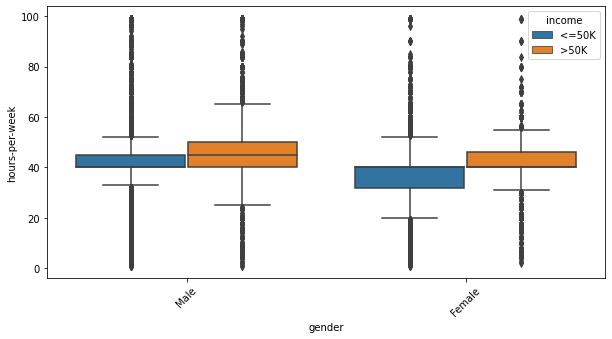

In [16]:
# next we can use box plot to check relationship between gender and hours-per-work based on income
plt.figure(figsize=(10,5))

sns.boxplot(x='gender',y='hours-per-week',data=new_df,hue="income")
plt.xticks(rotation=45)

plt.show()

# Observation
We can see that there are outliers in hours-per-week but something can be infered by this:
1. Males earning <= 50K are working for on average 43 hours-per-week, whereas, males with income >50K are working on average 45 hours-per-week.

2. Females earning <= 50K are working for 33 hours-per-week, whereas, females with income >50K are working for on average 43 hours-per-week

This concludes that females are getting some-what equal income than male by working less hours-per-week than males.

Also, hours-per-week is dependent on income

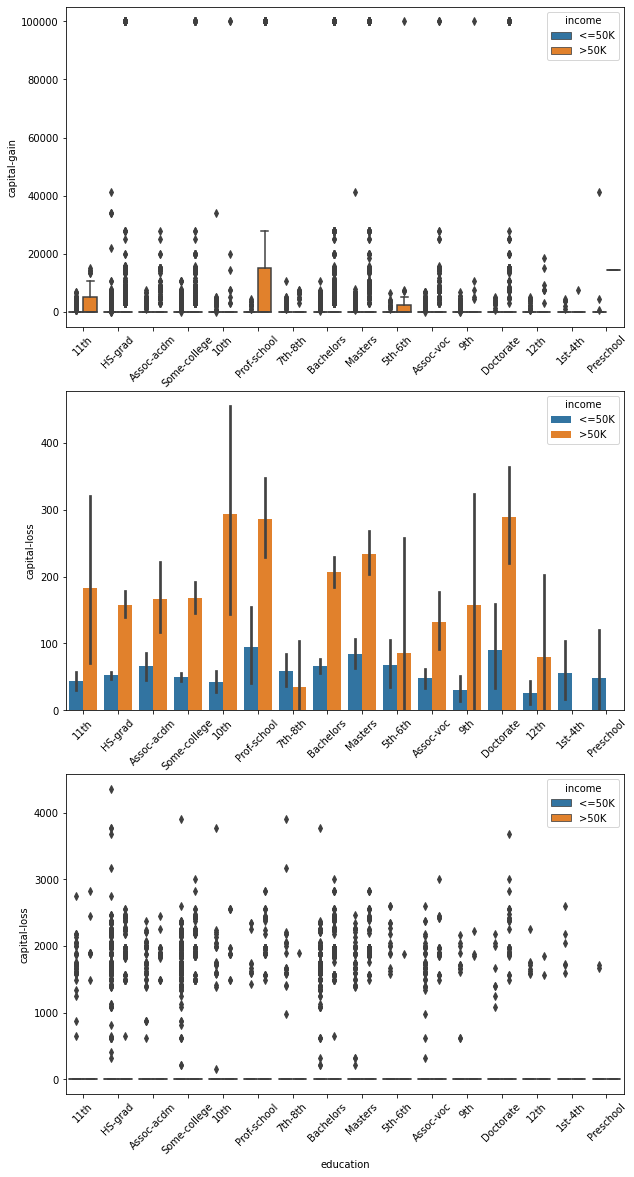

In [17]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.boxplot(x='education',y='capital-gain',data=new_df,hue="income")
plt.xticks(rotation=45)

plt.subplot(3,1,2)
sns.barplot(x='education',y='capital-loss',data=new_df,hue="income")
plt.xticks(rotation=45)

plt.subplot(3,1,3)
sns.boxplot(x='education',y='capital-loss',data=new_df,hue="income")
plt.xticks(rotation=45)

plt.show()

# Observation
* Outliers are present
* One can see that people having their education as 'Prof-school' have greater 'capital-gain' that is more profit as comared to people having other edication. Also for people with income '<=50K' are having outliers which seems to make this information about people of this category not abailable
* The other two plots which are bar-plot and box-plot of capital-loss vs education says that peoplr having their education as 'Prof-scholar' are also facing greater 'capital-loses' with people having education as'10th' classified as income '>50K'. but box-plot says that the information is full of outliers which concludes that this relationship is not worth to be considered too.


So, bar-plot is beter for features to describe over some contable attribute, but for describing characteristics of a feature box-plot is always the key.

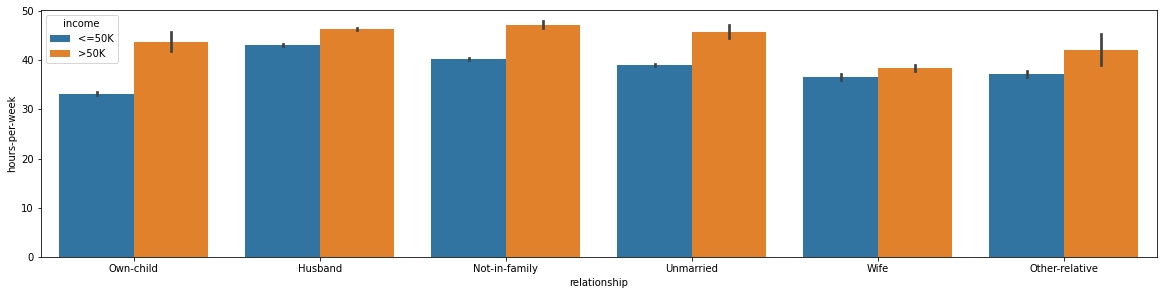

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x="relationship", y="hours-per-week", hue="income", data=new_df)

plt.show()


# Observation
* Husbands have an higher income than any other 'relation' in the population, but there exist some outliers in the data too

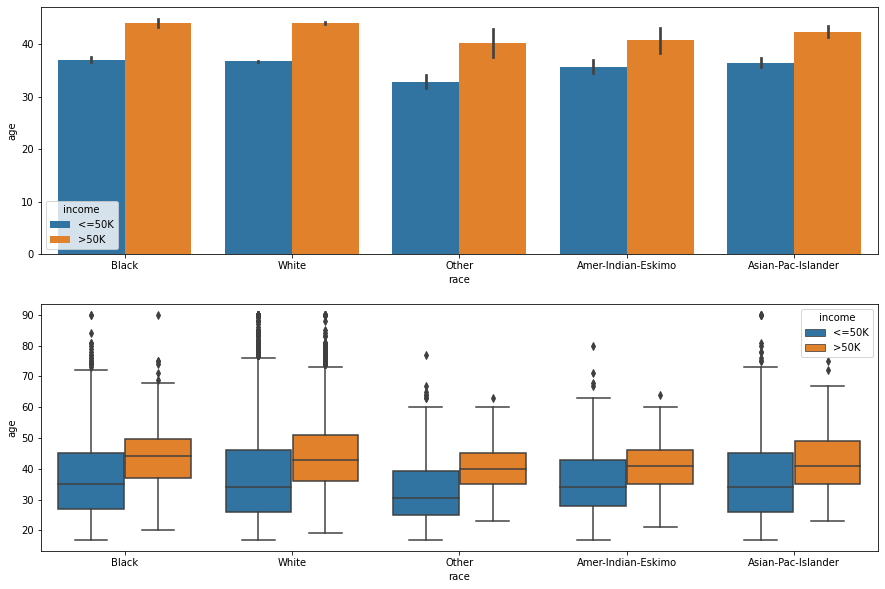

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x="race", y="age", hue="income", data=new_df)

plt.subplot(2,1,2)
sns.boxplot(x="race", y="age", hue="income", data=new_df)
plt.show()

# Observation
* In this relation outliers are less as compared to other relations.
* In terms of age to income there seems to have no discriminationtion at all amoung the people.
* Also the 'other' race seems to start earning income '<=50K' quite early as compared to other races, somewhat at an age of 25.

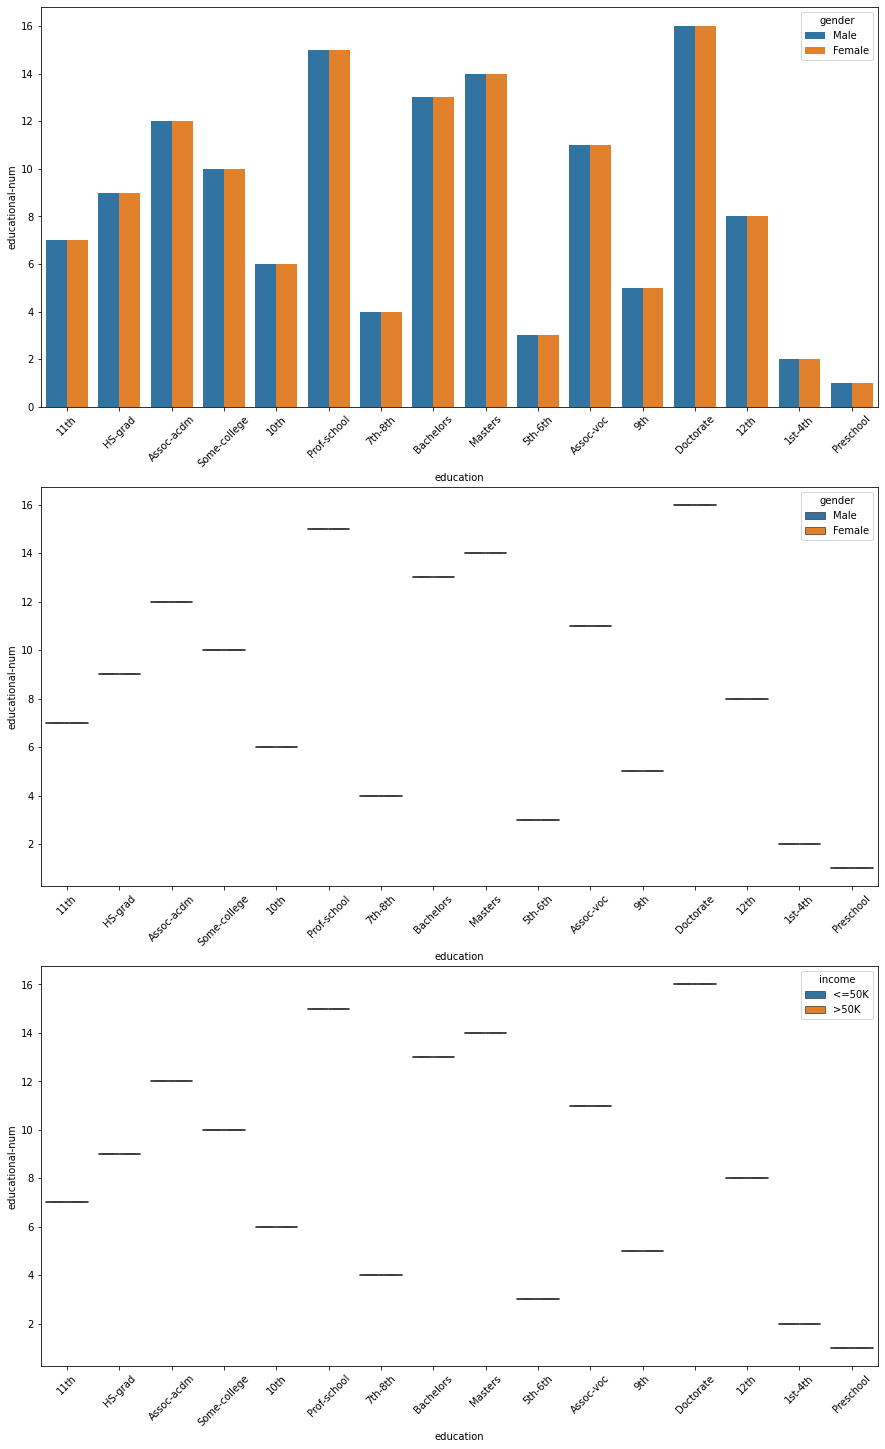

In [20]:
plt.figure(figsize=(15,25))

plt.subplot(3,1,1)
sns.barplot(x="education", y="educational-num", hue="gender", data=new_df)
plt.xticks(rotation=45)

plt.subplot(3,1,2)
sns.boxplot(x="education", y="educational-num", hue="gender", data=new_df)
plt.xticks(rotation=45)

#for income
plt.subplot(3,1,3)
sns.boxplot(x="education", y="educational-num", hue="income", data=new_df)
plt.xticks(rotation=45)

plt.show()

# Observation

* This observation makes me conclude that there are certain combinations of both numerical and categorical features which can make effect of outliers low or high of certain cases.
* For any way of classification graph seems to stay the same, that is for any value of hue graph are the same. This mean that both 'education' and 'education-num' are related to each other.
* In entire dataset these two features are always correct and depend on each other that is 'education' of 'Preschool' always takes 1 'education-num' or 1 year to complete, whatever basis for classification remains.
* This also means that box-plot always doesn't find outliers accuratley, as I concluded 'education-num' had certain outliers.

# Step 6 (Conslusion)

* This dataset is full of outliers for numerical columns, making this dataset extremly difficult to work upon.
* Most of the people who earning more than 50K and even greater in the population are over 50 years of age.
* For big numbers of outliers box-plot is the safe choice to perform bivariate analysis over both numerical and categorical analysis as compared to that of box-plot  which is good option to extract information related to count.
* Females in the population are enjoying more previllages for working less hours-per-week as compared to that of males.
* Age has the least amount of outliers and thus is more sensible to derive relationships based on this fact.
* After performing EDA on this dataset I can conclusivly rank all numerical columns based on increasing number of outliers as follows:

                 'educational-num'<'age'<'hours-per-work'<'capital-loss'<'capital-gain'

* Some times box-plot doesn't describe outliers accuratlly and analyst should always precheck things while performing EDA before jumping to conclusions,for eg: relationship of 'education' and 'education-num'.
* For those people who have their 'workclass' and 'occupation' as NaN, shall always belong to 'United-States'.

# Step 7 (Feature Transformation)

In [21]:
# for Numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

"""To get standard value for each feature
Based on this formula 
 std = Xi – min(X) / (max(X)–min(X))
 where, X = Array and Xi=array element
"""
scaler.fit(num_df)

standard_num_df=scaler.transform(num_df)

#now converting numpy array to dataframe
standard_num_df=pd.DataFrame(standard_num_df)
standard_num_df.head()

#Rename the columns
temp={}
for i,j in zip(range(len(num_cols)),num_cols):
    temp[i]=j

standard_num_df.rename(columns=temp,inplace=True)
standard_num_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.076881,0.0,0.397959
4,0.232877,0.333333,0.000000,0.0,0.295918


In [22]:
### for Categorical Features


#using dummy variables as no feature has less than 2 categories 
standard_cat_df=pd.get_dummies(cat_df,columns=cat_cols)
standard_cat_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
